In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
filelist = list()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filename = os.path.join(dirname, filename)
        print(filename)
        filelist.append(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dutch-tweets/dutch_tweets_chunk1.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk6.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk7.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk9.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk2.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk8.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk4.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk3.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk5.json
/kaggle/input/dutch-tweets/dutch_tweets_chunk0.json


In [73]:
# Installing necessary libraries like wordcloud and millify
!pip install wordcloud
!pip install millify
!pip install stopwords

In [74]:
# importing plotly, matplotlib, seaborn and wordcloud

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import wordcloud
    
import seaborn as sns
import string
import plotly.express as px 
import numpy as np
import pandas as pd 
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk

from nltk.corpus import stopwords
from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

**Creating a tweets dataframe from the data extracted from json files**

In [75]:
%%time 


tweets = pd.DataFrame()
for file in filelist:
    temp_file = pd.read_json(file)
    tweets = pd.concat([tweets, temp_file])
    print(file)
    print(tweets.shape)
    
import numpy as np
import pandas as pd

# creating a tweets dataframe
tweets = pd.DataFrame()
for file in filelist:
    temp_file = pd.read_json(file)
    tweets = pd.concat([tweets,temp_file])

/kaggle/input/dutch-tweets/dutch_tweets_chunk1.json
(27142, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk6.json
(54168, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk7.json
(81402, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk9.json
(108623, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk2.json
(135753, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk8.json
(162890, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk4.json
(190107, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk3.json
(217219, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk5.json
(244323, 23)
/kaggle/input/dutch-tweets/dutch_tweets_chunk0.json
(271342, 23)
CPU times: user 18 s, sys: 678 ms, total: 18.7 s
Wall time: 18.7 s


**Analyzing tweets for missing values and visualizing it in a bar chart**

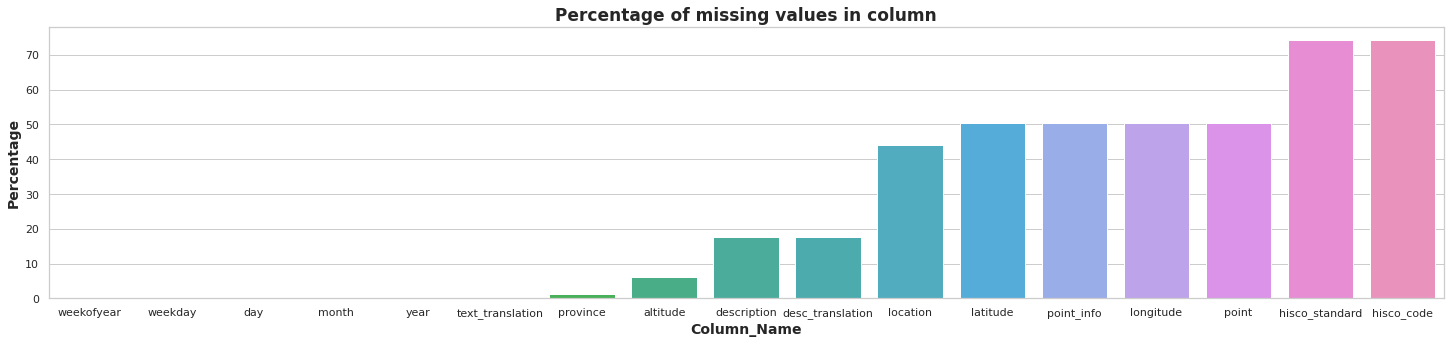

In [76]:
# analyzing tweets for missing values and visualization 

missing_values = pd.DataFrame()
missing_values['column'] = tweets.columns

missing_values['percent'] = [round(100*tweets[col].isnull().sum()/len(tweets),2) for col in tweets.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

plt.figure(figsize=(25,5))
sns.set(style='whitegrid', color_codes=True)
splot = sns.barplot(x='column',y='percent', data=missing_values)
plt.xlabel("Column_Name",size=14, weight="bold")
plt.ylabel("Percentage",size=14, weight="bold")
plt.title("Percentage of missing values in column", fontweight="bold", size=17)
plt.show()

**Analyzing tweets for unique values across each column and visualizing it in a bar chart**

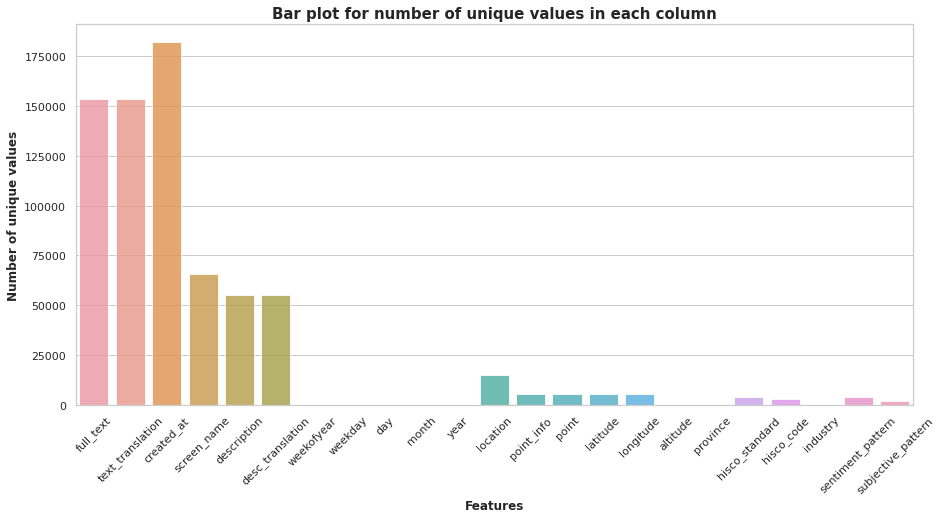

In [77]:
# analyzing for unique values for each column in tweets dataframe

unique_df = pd.DataFrame()
unique_df['Features'] = tweets.columns
unique=[]
for i in tweets.columns:
    unique.append(tweets[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))
# f, zx = plt.subplots(1, 1, figsize=(15, 7))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)

# annotation of each bar in the barplot
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
#                    va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Number of unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
# plt.ylabel('#Unique values', size=12, weight='bold')
# plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=45)
plt.show()

Normally users don't enable their location information while tweeting. (almost never!). Geo-location data is considerd if the user has shared their location. 60% of the users have not provided their location in their bios ( 161/271). The distribution of users who have enabled thier location is shown below.

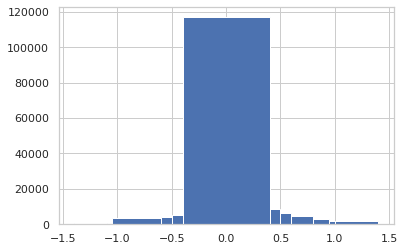

In [17]:
# analyzing the tweets with the most common sentiment pattern and plotting it in a bar chart

from collections import Counter

province = Counter(tweets['sentiment_pattern'].values.tolist())
province.most_common()
counts, values = zip(*province.most_common())
provinceDF = pd.DataFrame(list(zip(province.keys(), province.values())), columns = ["province", "frequency"])
provinceDF.sort_values(by='frequency', inplace=True)
# provinceDF['frequency']
plt.bar(provinceDF['province'], provinceDF['frequency'])
plt.show()

None
      province  frequency
1996 -0.162000          1
3477 -0.176250          1
3478 -0.082812          1
3485  0.842500          1
3834 -0.069531          1
...        ...        ...
60    0.150000       4599
54   -0.100000       5209
12    0.200000       6355
30    0.100000       8571
3     0.000000     116973

[3994 rows x 2 columns]


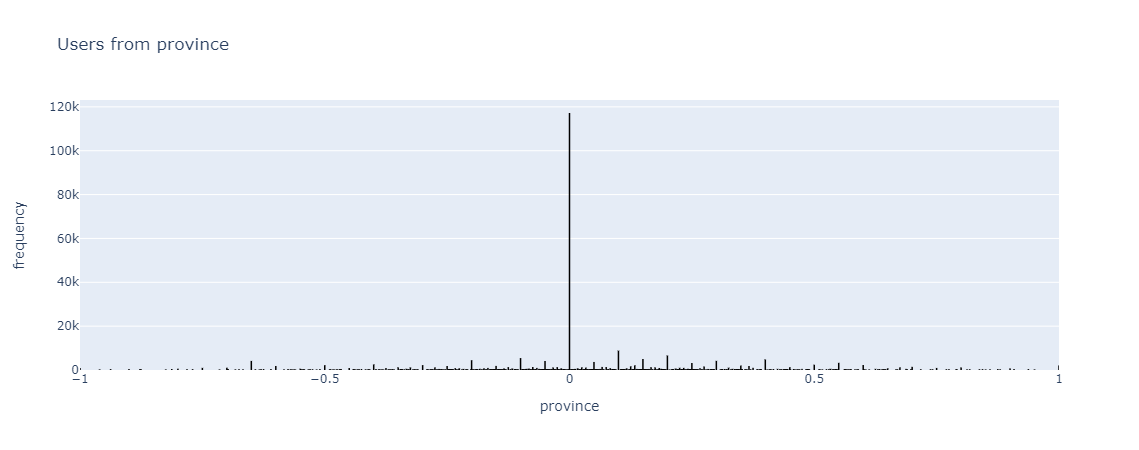

In [18]:
# prepare frame by renaming Unavailable data as NA
print(provinceDF.sort_values(by='frequency' , inplace=True))
print(provinceDF)


# Creating trace1
trace1 = go.Bar(
                    x = provinceDF.province,
                    y = provinceDF.frequency,
                    name = "geospread",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = provinceDF.province)

data = [trace1]
layout = dict(title = 'Users from province',
              xaxis= dict(title= 'province',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'frequency',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Analyzing the dataset for getting the top 20 screennames who tweeted the most dutch tweets in netherlands

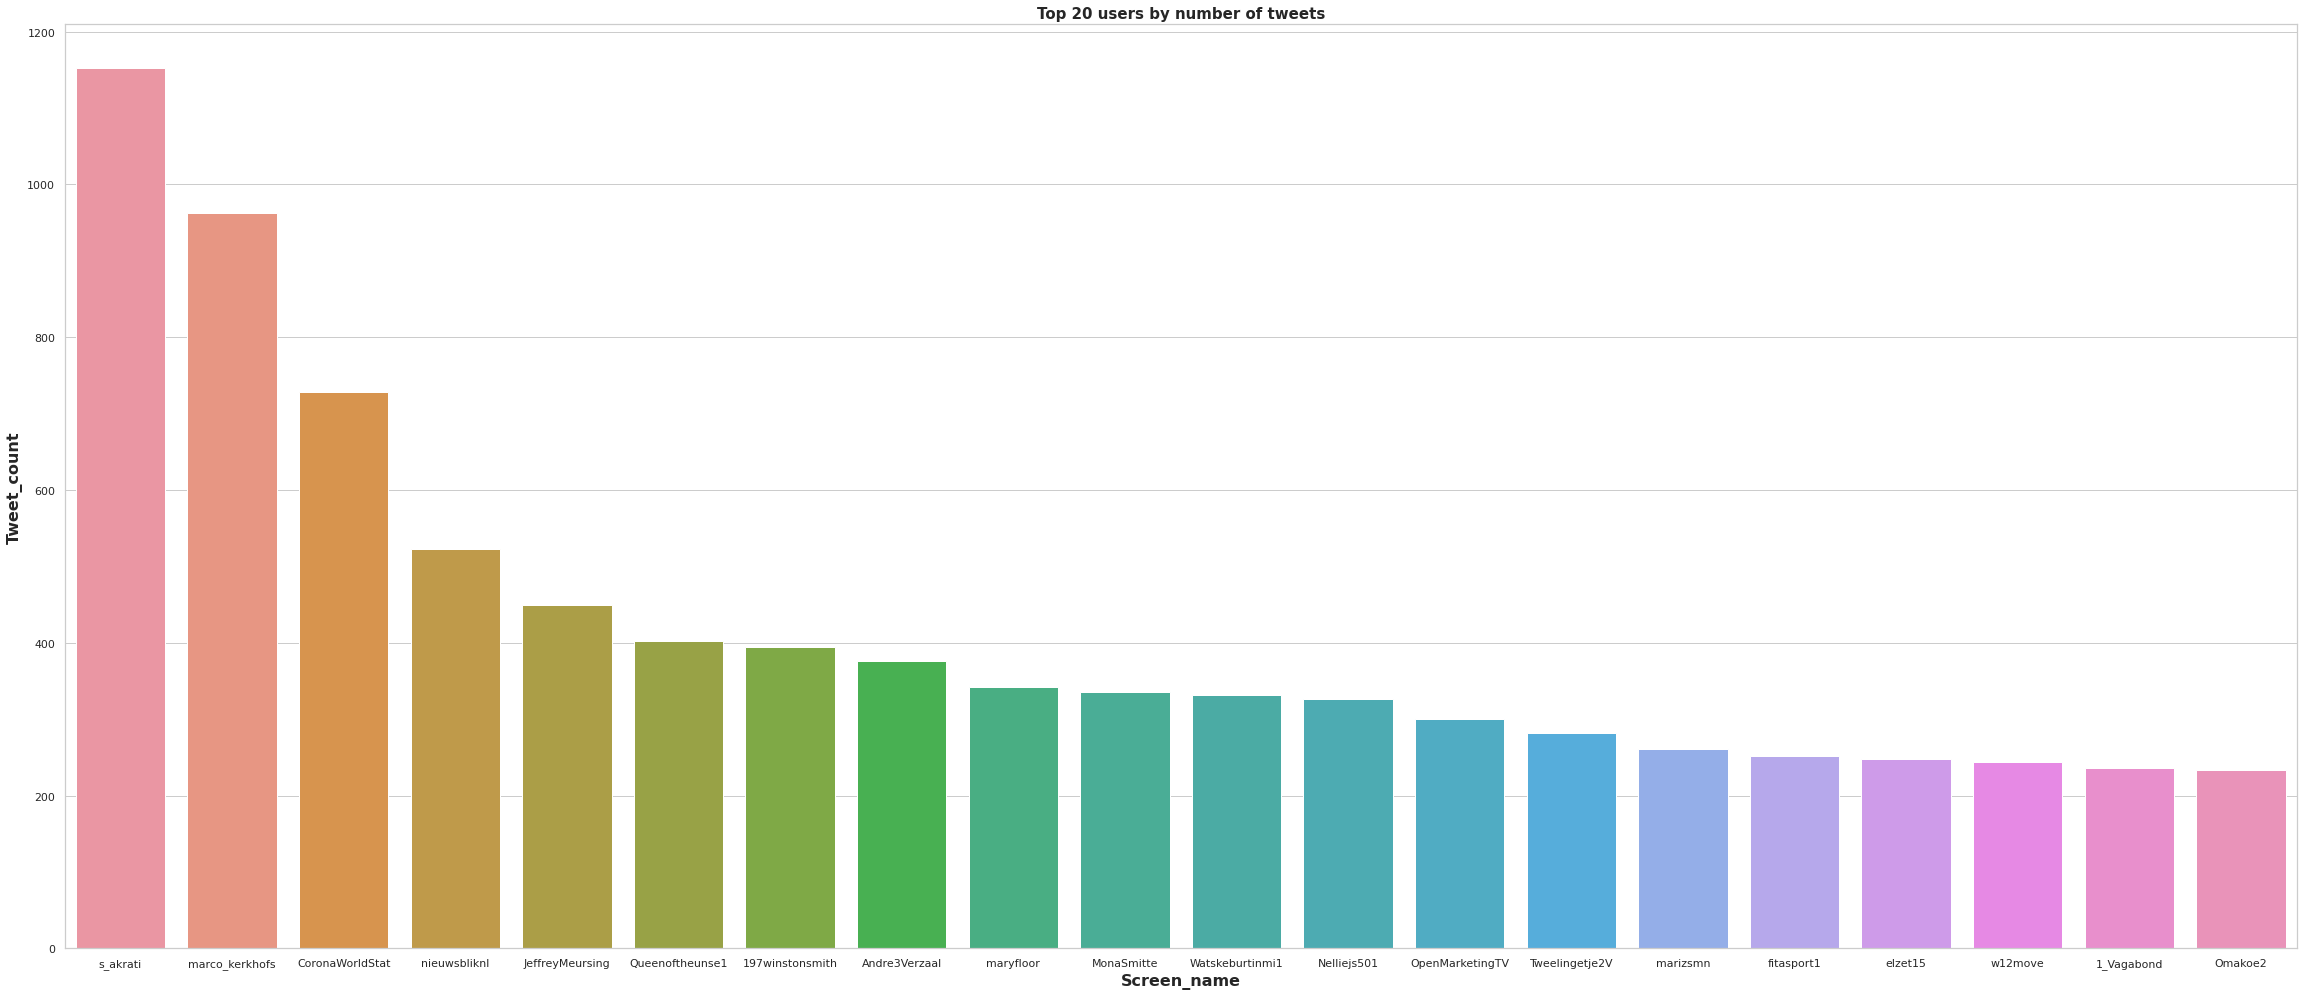

In [80]:
# top 20 screenames who tweeted the most dutch tweets

tweets_screenname_count = tweets['screen_name'].value_counts().reset_index()
plt.figure(figsize=(40,17))
sns.barplot(x='index', y='screen_name', data= tweets_screenname_count.head(20))
plt.title('Top 20 users by number of tweets', weight='bold', size=15)
plt.ylabel('Tweet_count', size=16, weight='bold')
plt.xlabel('Screen_name', size=16, weight='bold')
plt.show()

The bar chart below shows the mean sentiment score across 4 major regions in netherlands. Rotterdam has the highest mean sentiment across all region. Hague has the lowest mean sentiment across these 4 regions

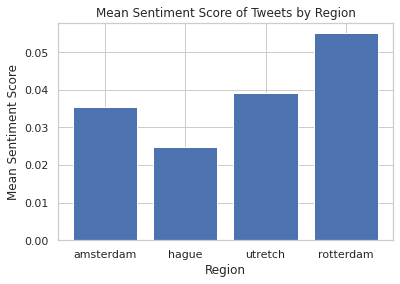

In [22]:
# The assumption here is that we are finding the mean sentiment score across 4 regions in Netherlands due to time constraints

amsterdam_tweets = tweets[tweets['location']=='Amsterdam']
Hague_tweets = tweets[tweets['location']=='The Hague, The Netherlands']
utretch_tweets = tweets[tweets['location']=='Utrecht, Nederland']
rotterdam_tweets = tweets[tweets['location']=='Rotterdam']

area_dict = dict(zip(amsterdam_tweets.weekofyear, amsterdam_tweets.sentiment_pattern))

amsterdam_tweets_sentiment = amsterdam_tweets['sentiment_pattern']
hague_tweets_sentiment = Hague_tweets['sentiment_pattern']
utretch_tweets_sentiment = utretch_tweets['sentiment_pattern']
rotterdam_tweets_sentiment = rotterdam_tweets['sentiment_pattern']

region_dct = {'amsterdam': [amsterdam_tweets_sentiment], 'hague': [hague_tweets_sentiment], 'utretch': [utretch_tweets_sentiment], 'rotterdam':[rotterdam_tweets_sentiment]}


# Assuming `region_scores` is a dictionary where the keys are regions and the values are lists of sentiment scores for tweets from that region
regions = list(region_dct.keys())
mean_scores = [np.mean(region_dct[region]) for region in regions]

plt.bar(regions, mean_scores)
plt.xlabel("Region")
plt.ylabel("Mean Sentiment Score")
plt.title("Mean Sentiment Score of Tweets by Region")
plt.show()

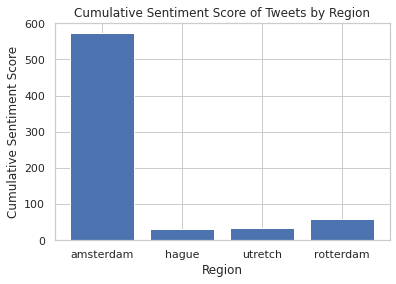

In [23]:
regions = list(region_dct.keys())
cumulative_scores = [np.sum(region_dct[region]) for region in regions]

plt.bar(regions, cumulative_scores)
plt.xlabel("Region")
plt.ylabel("Cumulative Sentiment Score")
plt.title("Cumulative Sentiment Score of Tweets by Region")
plt.show()

From the heat map below, one can study the correlation between different features in the dataset. It can be seen from the heatmap that there is a positive correlation between weeksofyear and subjective pattern and sentiment pattern. It can also be seen that there is a positive correlation between the subjective pattern and the industry as well.

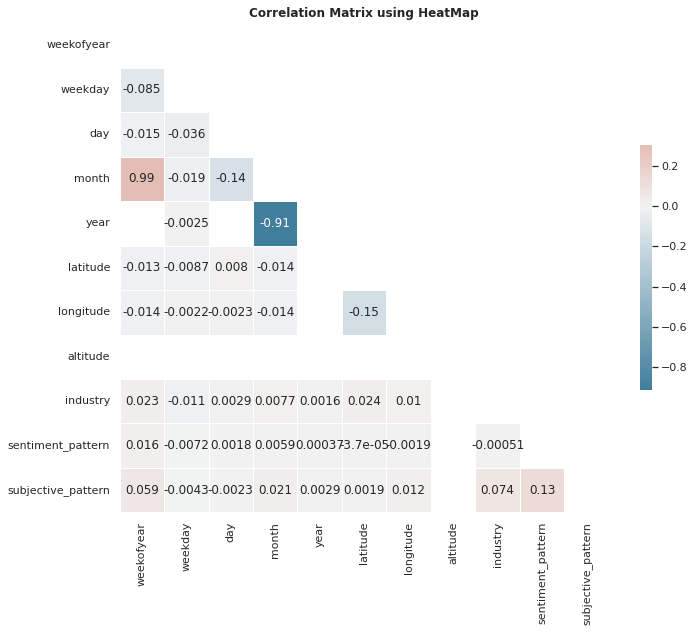

In [27]:
mask = np.triu(np.ones_like(tweets.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(tweets.corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix using HeatMap",fontweight="bold")
plt.show()

The time series plot below shows the mean sentiment score over weeks in the year for Netherlands. We can conclude from the time series plot below that there are two peaks around the 12th and 14th weeks which show the highest mean sentiment score. This shows that majority of the people during these weeks were tweeting with a positive sentiment. 

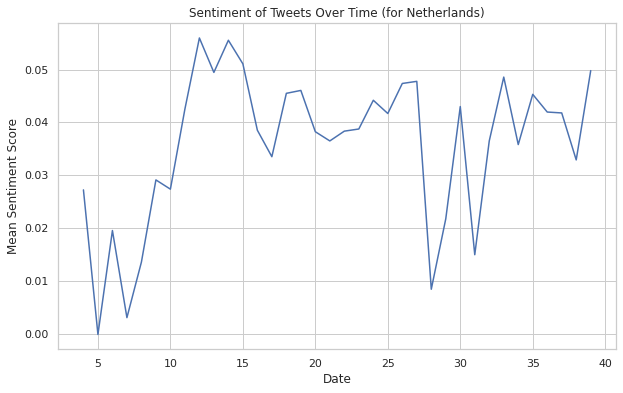

In [29]:
mean_sentiment_by_date = tweets.groupby('weekofyear')['sentiment_pattern'].mean()

# Plot the mean sentiment scores over time
mean_sentiment_by_date.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment of Tweets Over Time (for Netherlands)')
plt.show()

The time series plot below shows the mean sentiment score over weeks in the year for Amsterdam. We can conclude from the time series plot below that there are two peaks around the 11th and 14th weeks which show the highest mean sentiment score of tweets for Amsterdam. This shows that majority of the people living in Amsterdam were tweeting with a positive sentiment. 

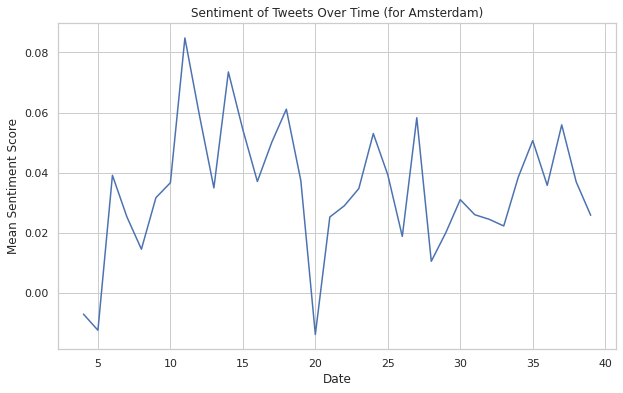

In [30]:
# time series analysis for amsterdam region
amsterdam_mean_sentiment = amsterdam_tweets.groupby('weekofyear')['sentiment_pattern'].mean()

# Plot the mean sentiment scores over time
amsterdam_mean_sentiment.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment of Tweets Over Time (for Amsterdam)')
plt.show()

Creating a word cloud for top 20 users who tweeted in Netherlands

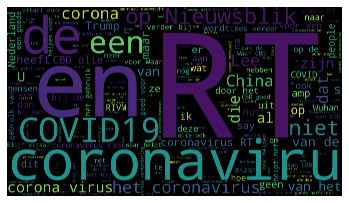

In [79]:
# Group by username and count the number of tweets for each user
top_20_screen_names = tweets['screen_name'].value_counts().head(20)
subset_tweets=  tweets[tweets['screen_name'].isin(top_20_screen_names.index)]
processed_tweets = []
# tweet_text = ' '.join(subset_tweets['full_text'])
for tweet in subset_tweets['full_text']:
    # Remove stop words
    # You will need to install the stopwords library and download the stop words for your language
    stop_words = set(stopwords.words("english"))
    words = [word for word in tweet.split() if word not in stop_words]
    
    # Remove punctuation
    
    words = [word.translate(str.maketrans("", "", string.punctuation)) for word in words]
    
    # Remove any other irrelevant information
    # For example, you may want to remove URLs, hashtags, and mentions
    words = [word for word in words if not word.startswith(("http", "#", "@"))]
    
    # Add the preprocessed tweet to the list
    processed_tweets.append(" ".join(words))
cloud = wordcloud.WordCloud(width=7800,height=4400).generate(" ".join(processed_tweets))
cloud.to_file("cloud.png")
# Display the word cloud
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Key Takeaways from the analysis presented in this notebook.**

1. The columns hisco standard and hisco code in tweets dataframe have the most missing values.
2. The columns text translation and created_at in tweets dataframe had the most number of unique values.
3. 60% of the users have not provided their location in their bios ( 161/271)
4. Users who provided their location along with their tweets, majortiy of them have a neutral sentiment.
5. The top 20 screennames who tweeted the most dutch tweets in Netherlands include s_akkrati, marco_kerkhofs and coronawordlstat.
6. There is a bar chart in this notebook showing the mean sentiment score across 4 major regions in netherlands (we assume that the 4 major regions are amsterdam, hague, rotterdam and utertch. Rotterdam has the highest mean sentiment across all region. Hague has the lowest mean sentiment across these 4 regions
7. It can be seen from a heatmap in this notebook that there is a positive correlation between weeksofyear and subjective pattern and sentiment pattern. It can also be seen from the heatmap that there is a positive correlation between the subjective pattern and the industry as well.
8. Majority of the people living in Amsterdam were tweeting with a positive sentiment shown by two peaks in a time series. 
9.  Majority of the people from the whole Netherlands in some weeks were tweeting with a positive sentiment shown by two peaks in a time series.
10. The word cloud for top 20 users who tweeted in Netherlands, shows that tweets were focused on topics of covid-19 and corona virus, meaning people were focused on tweeting about covid.